Importing the Dependencies

In [3]:
#Importing the basic dependencies
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle




Data Collection and Processing

In [4]:
#loading a csv data to pandas data frame
heart_data = pd.read_csv('heart.csv')

In [5]:
#Print first 5 rows of the data set
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#Print last 5 rows of the data set
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
#Number of rows and columns in the data set
heart_data.shape

(1025, 14)

In [8]:
#Getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
#checking for missing value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#Stastical message about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#Checking the distribution of target varaible
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1 : Represents defective heart

2 : Represents healthy heart

Splitting the features and targets


In [12]:
 x = heart_data.drop(columns='target',axis=1)
 y = heart_data['target']
 print(x , y )

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [13]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Splitting the Data into Training data and Test data

In [15]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [16]:
#Checking the train and test data
print(x.shape , X_train.shape , X_test.shape)
print(y.shape , Y_train.shape , Y_test.shape)

(1025, 13) (820, 13) (205, 13)
(1025,) (820,) (205,)


## Feature Scaling and Standardization

In [17]:
## Standardization
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)



In [18]:
x_test_scaled

array([[ 0.40082963,  0.66989794, -0.89914409, ...,  0.99692737,
        -0.73022193,  1.09960421],
       [-2.1325641 ,  0.66989794,  0.07740976, ...,  0.99692737,
        -0.73022193, -0.5398057 ],
       [-0.14990813, -1.4927647 ,  1.0539636 , ...,  0.99692737,
        -0.73022193, -3.81862554],
       ...,
       [ 0.62112474, -1.4927647 ,  2.03051745, ...,  0.99692737,
        -0.73022193, -0.5398057 ],
       [-0.48035079,  0.66989794, -0.89914409, ..., -0.62828226,
        -0.73022193,  1.09960421],
       [ 0.9515674 , -1.4927647 ,  0.07740976, ...,  0.99692737,
         1.19203163, -0.5398057 ]])

Model Training

Logistic Regresssion Model

In [19]:
#Importing the logistic Regression Model
logistic_reg  = LogisticRegression()

In [20]:
#Training the model with training data
logistic_reg.fit(x_train_scaled,Y_train)
y_pred = logistic_reg.predict(x_test_scaled)
score = accuracy_score(Y_test,y_pred)
print('Model Score:-',score)

Model Score:- 0.8341463414634146


Model Evaluation

Accuracy Score

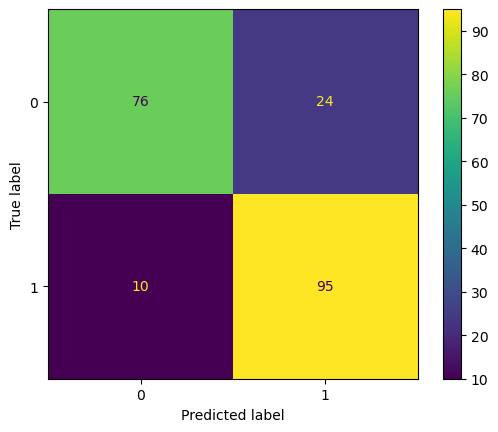

In [21]:
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Pickling The Model

In [22]:
pickle.dump(scalar,open('scalar.pkl','wb'))
pickle.dump(logistic_reg,open('model.pkl','wb'))